# KBO 2022 ~ 2024 일자별 순위 크롤링
- 2024-06-05

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

In [28]:
# Chrome Browser와 Chrome Driver Version 확인
chrome_options = webdriver.ChromeOptions()

# 요청
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
url = 'https://www.koreabaseball.com/Record/TeamRank/TeamRankDaily.aspx'
driver.get(url)

game_rank_dict = {}

count = 0
while True :
    count += 1
    # 날짜
    date = driver.find_element(By.ID, 'cphContents_cphContents_cphContents_lblSearchDateTitle').text

    # row_date, 한 팀의 데이터
    row_data = driver.find_element(By.TAG_NAME, 'tbody').find_elements(By.TAG_NAME, 'tr')
    
    # 한팀의 데이터들을 통해 dictionary 구성
    for row in row_data :

        # game_rank_dict에 팀명으로 되어있는 키가 없다면,
        if row.find_elements(By.TAG_NAME, 'td')[1].text not in game_rank_dict.keys() :
            # 팀명으로 키를 갖는 배열 값을 생성
            game_rank_dict[row.find_elements(By.TAG_NAME, 'td')[1].text] = []

        # 배열 안에 dictionary append
        game_rank_dict[row.find_elements(By.TAG_NAME, 'td')[1].text].append(
            {
                '날짜' : date,
                '팀명' : row.find_elements(By.TAG_NAME, 'td')[1].text,
                '순위' : row.find_elements(By.TAG_NAME, 'td')[0].text,
                '총 경기수' : row.find_elements(By.TAG_NAME, 'td')[2].text,
                '승리' : row.find_elements(By.TAG_NAME, 'td')[3].text,
                '패배' : row.find_elements(By.TAG_NAME, 'td')[4].text,
                '무승부' : row.find_elements(By.TAG_NAME, 'td')[5].text,
                '승률' : row.find_elements(By.TAG_NAME, 'td')[6].text,
                '게임차' : row.find_elements(By.TAG_NAME, 'td')[7].text,
                '최근 10경기 전적' : row.find_elements(By.TAG_NAME, 'td')[8].text,
                '연속 승패 현황' : row.find_elements(By.TAG_NAME, 'td')[9].text,
                '홈 경기 전적' : row.find_elements(By.TAG_NAME, 'td')[10].text,
                '원정 경기 전적' : row.find_elements(By.TAG_NAME, 'td')[11].text
            }
        )

    print(f'-----{date}-----')
    print('기아 : ', len(game_rank_dict['KIA']))
    print('반복 count :', count)

    # 이전 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="cphContents_cphContents_cphContents_udpRecord"]/div[1]/span[1]').click()

    time.sleep(1)

    if date == '2022.04.02' :
        break



-----2024.06.04-----
기아 :  1
반복 count : 1
-----2024.06.02-----
기아 :  2
반복 count : 2
-----2024.06.01-----
기아 :  3
반복 count : 3
-----2024.05.31-----
기아 :  4
반복 count : 4
-----2024.05.30-----
기아 :  5
반복 count : 5
-----2024.05.29-----
기아 :  6
반복 count : 6
-----2024.05.28-----
기아 :  7
반복 count : 7
-----2024.05.26-----
기아 :  8
반복 count : 8
-----2024.05.25-----
기아 :  9
반복 count : 9
-----2024.05.24-----
기아 :  10
반복 count : 10
-----2024.05.23-----
기아 :  11
반복 count : 11
-----2024.05.22-----
기아 :  12
반복 count : 12
-----2024.05.21-----
기아 :  13
반복 count : 13
-----2024.05.19-----
기아 :  14
반복 count : 14
-----2024.05.18-----
기아 :  15
반복 count : 15
-----2024.05.17-----
기아 :  16
반복 count : 16
-----2024.05.16-----
기아 :  17
반복 count : 17
-----2024.05.15-----
기아 :  18
반복 count : 18
-----2024.05.14-----
기아 :  19
반복 count : 19
-----2024.05.12-----
기아 :  20
반복 count : 20
-----2024.05.11-----
기아 :  21
반복 count : 21
-----2024.05.10-----
기아 :  22
반복 count : 22
-----2024.05.09-----
기아 :  23
반복 count : 23
-----2

In [31]:
# dict key 확인
game_rank_dict.keys()

dict_keys(['KIA', 'LG', '삼성', '두산', 'SSG', 'NC', 'KT', '한화', '롯데', '키움'])

In [34]:
import pandas as pd

In [38]:
kia = pd.DataFrame(game_rank_dict['KIA'])
kia.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적
0,2024.06.04,KIA,1,59,35,23,1,0.603,0,6승0무4패,2패,16-1-13,19-0-10
1,2024.06.02,KIA,1,58,35,22,1,0.614,0,6승0무4패,1패,16-1-12,19-0-10
2,2024.06.01,KIA,1,57,35,21,1,0.625,0,6승0무4패,1승,16-1-11,19-0-10
3,2024.05.31,KIA,1,56,34,21,1,0.618,0,5승0무5패,1패,15-1-11,19-0-10
4,2024.05.30,KIA,1,55,34,20,1,0.630,0,6승0무4패,5승,15-1-10,19-0-10


In [39]:
# dtype 확인
kia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   날짜          388 non-null    object
 1   팀명          388 non-null    object
 2   순위          388 non-null    object
 3   총 경기수       388 non-null    object
 4   승리          388 non-null    object
 5   패배          388 non-null    object
 6   무승부         388 non-null    object
 7   승률          388 non-null    object
 8   게임차         388 non-null    object
 9   최근 10경기 전적  388 non-null    object
 10  연속 승패 현황    388 non-null    object
 11  홈 경기 전적     388 non-null    object
 12  원정 경기 전적    388 non-null    object
dtypes: object(13)
memory usage: 39.5+ KB


### 순위, 총 경기수, 승리, 패배, 무승부, 승률, 게임차 --> type 변경

In [42]:
kia['순위'] = kia['순위'].astype(int)
kia['총 경기수'] = kia['총 경기수'].astype(int)
kia['승리'] = kia['승리'].astype(int)
kia['패배'] = kia['패배'].astype(int)
kia['무승부'] = kia['무승부'].astype(int)
kia['승률'] = kia['승률'].astype(float)
kia['게임차'] = kia['게임차'].astype(float)

In [64]:
kia.head()

,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적
0,2024.06.04,KIA,1,59,35,23,1,0.603,0.0,6승0무4패,2패,16-1-13,19-0-10
1,2024.06.02,KIA,1,58,35,22,1,0.614,0.0,6승0무4패,1패,16-1-12,19-0-10
2,2024.06.01,KIA,1,57,35,21,1,0.625,0.0,6승0무4패,1승,16-1-11,19-0-10
3,2024.05.31,KIA,1,56,34,21,1,0.618,0.0,5승0무5패,1패,15-1-11,19-0-10
4,2024.05.30,KIA,1,55,34,20,1,0.630,0.0,6승0무4패,5승,15-1-10,19-0-10


In [65]:
kia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          388 non-null    object 
 1   팀명          388 non-null    object 
 2   순위          388 non-null    int64  
 3   총 경기수       388 non-null    int64  
 4   승리          388 non-null    int64  
 5   패배          388 non-null    int64  
 6   무승부         388 non-null    int64  
 7   승률          388 non-null    float64
 8   게임차         388 non-null    float64
 9   최근 10경기 전적  388 non-null    object 
 10  연속 승패 현황    388 non-null    object 
 11  홈 경기 전적     388 non-null    object 
 12  원정 경기 전적    388 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 39.5+ KB


### 날짜 형식 변경

In [69]:
kia['날짜'] = pd.to_datetime(kia['날짜'])

In [71]:
kia.info()
kia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          388 non-null    datetime64[ns]
 1   팀명          388 non-null    object        
 2   순위          388 non-null    int64         
 3   총 경기수       388 non-null    int64         
 4   승리          388 non-null    int64         
 5   패배          388 non-null    int64         
 6   무승부         388 non-null    int64         
 7   승률          388 non-null    float64       
 8   게임차         388 non-null    float64       
 9   최근 10경기 전적  388 non-null    object        
 10  연속 승패 현황    388 non-null    object        
 11  홈 경기 전적     388 non-null    object        
 12  원정 경기 전적    388 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 39.5+ KB


,날짜,팀명,순위,총 경기수,승리,패배,무승부,승률,게임차,최근 10경기 전적,연속 승패 현황,홈 경기 전적,원정 경기 전적
0,2024-06-04,KIA,1,59,35,23,1,0.603,0.0,6승0무4패,2패,16-1-13,19-0-10
1,2024-06-02,KIA,1,58,35,22,1,0.614,0.0,6승0무4패,1패,16-1-12,19-0-10
2,2024-06-01,KIA,1,57,35,21,1,0.625,0.0,6승0무4패,1승,16-1-11,19-0-10
3,2024-05-31,KIA,1,56,34,21,1,0.618,0.0,5승0무5패,1패,15-1-11,19-0-10
4,2024-05-30,KIA,1,55,34,20,1,0.630,0.0,6승0무4패,5승,15-1-10,19-0-10


In [73]:
# 정렬 변경
kia.sort_values('날짜', inplace=True)

In [76]:
# index 초기화
kia.reset_index(drop='index', inplace=True)

(10.0, 1.0)

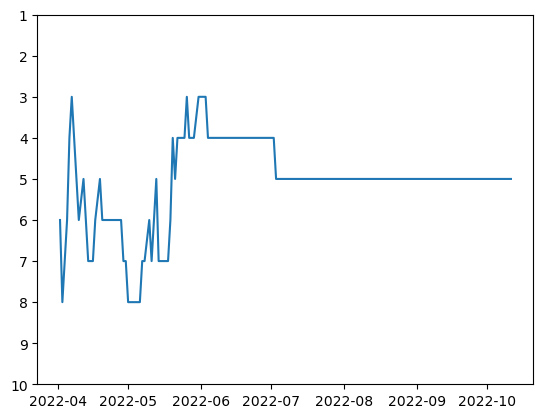

In [98]:
import matplotlib.pyplot as plt

plt.plot(
    # data=kia[kia.날짜.dt.year == 2022],
    kia[kia.날짜.dt.year == 2022].날짜,
    kia[kia.날짜.dt.year == 2022].순위
)

plt.ylim(10, 1)

In [103]:
# 위의 정제 과정을 반복을 통해 수행
for team in game_rank_dict.keys() :
    team_df = pd.DataFrame(game_rank_dict[team])

    # dtype 변경
    team_df['순위'] = team_df['순위'].astype(int)
    team_df['총 경기수'] = team_df['총 경기수'].astype(int)
    team_df['승리'] = team_df['승리'].astype(int)
    team_df['패배'] = team_df['패배'].astype(int)
    team_df['무승부'] = team_df['무승부'].astype(int)
    team_df['승률'] = team_df['승률'].astype(float)
    team_df['게임차'] = team_df['게임차'].astype(float)
    team_df['날짜'] = pd.to_datetime(team_df['날짜'])

    # 정렬
    team_df.sort_values('날짜', inplace=True)
    
    # index 초기화
    team_df.reset_index(drop='index', inplace=True)

    team_df.to_csv(f'./Data/rank/{team}_rank.csv',index=None)